# Part I - Ford GoBike Trip Data Exploration
## by Oluwaseyi SALAMI

## Introduction
This is an exploration of the Ford GoBike trip data containing info about bike rides made over a month in a ride-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import needed packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load data

In [2]:
rides = pd.read_csv('201902-fordgobike-tripdata.csv')

### Assess data

In [3]:
# View dataframe info and the first few rows
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# View the last few rows
rides.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
# describe numeric columns
rides.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [6]:
# Number of rides lasting more than 3 hours
(rides.duration_sec > 10800).sum()

417

In [7]:
# No of persons older than 80
(rides.member_birth_year < 1940).sum()

203

In [8]:
# describe categorical columns
rides.describe(include='O').T

,count,unique,top,freq
start_time,183412,183401,2019-02-22 20:11:42.2560,2
end_time,183412,183397,2019-02-11 18:53:55.0820,2
start_station_name,183215,329,Market St at 10th St,3904
end_station_name,183215,329,San Francisco Caltrain Station 2 (Townsend St...,4857
user_type,183412,2,Subscriber,163544
member_gender,175147,3,Male,130651
bike_share_for_all_trip,183412,2,No,166053


In [9]:
max_missing_pcent = ((rides.member_gender.isna()) | rides.start_station_id.isna()).sum() / rides.shape[0] * 100
print(f'Maximum percentage of missing values: {max_missing_pcent:.2f}',
      '; less than 5% of the data')

Maximum percentage of missing values: 4.61 ; less than 5% of the data


In [10]:
# Check duplicate rows
rides.duplicated().sum()

0

#### Quality issues
1. Missing values in the `..._station_id` and `member_...` columns.
2. Inappropriate datatypes: `start_time`, `end_time`, `..._id`, `user_type`, `gender` and `member_birth_year` columns.
2. More meaninful/concise names for `bike_share_for_all_trip`, `member_gender` and `member_birth_year` columns
3. It's unlikely that bike rides will last more than 3 hours at a time.
4. It's unlikely that riders will be more than more than 80 years old.

### Clean data

In [11]:
# Copy original data
rides_clean = rides.copy()

# Remove rows with missing data in the `_station_id` and `member_gender` columns
station_gender_bool = (rides_clean.member_gender.notna()) & (rides_clean.start_station_id.notna())
rides_clean = rides_clean[station_gender_bool]

In [12]:
# Change `_time` columns to the datetime datatype
for col in ['start_time', 'end_time']:
    rides_clean[col] = pd.to_datetime(rides_clean[col])

# Change '_id' columns to the string/object datatype
for col in ['start_station_id', 'end_station_id', 'bike_id']:
    rides_clean[col] = rides_clean[col].astype('int').astype('str')

# Change birth year values to integers
rides_clean['member_birth_year'] = rides_clean.member_birth_year.astype('int')

# Give columns more descriptive names
rides_clean.rename(columns={'member_birth_year': 'user_birth_year',
                            'member_gender': 'user_gender',
                            'bike_share_for_all_trip': 'is_shared_trip'},
                   inplace=True)

# Change gender and user type columns to the category data type
for col in ['user_type', 'user_gender']:
    rides_clean[col] = rides_clean[col].astype('category')

# Remove rows where age is greater than 80 or trip duration is greater than 3 hours
age_or_duration_bool = (rides_clean.user_birth_year > 1940) & (rides_clean.duration_sec < 10800)
rides_clean = rides_clean[age_or_duration_bool]

In [13]:
# Assess cleaning result
rides_clean.info()
rides_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174419 entries, 4 to 183411
Data columns (total 16 columns):
duration_sec               174419 non-null int64
start_time                 174419 non-null datetime64[ns]
end_time                   174419 non-null datetime64[ns]
start_station_id           174419 non-null object
start_station_name         174419 non-null object
start_station_latitude     174419 non-null float64
start_station_longitude    174419 non-null float64
end_station_id             174419 non-null object
end_station_name           174419 non-null object
end_station_latitude       174419 non-null float64
end_station_longitude      174419 non-null float64
bike_id                    174419 non-null object
user_type                  174419 non-null category
user_birth_year            174419 non-null int64
user_gender                174419 non-null category
is_shared_trip             174419 non-null object
dtypes: category(2), datetime64[ns](2), float64(4), int64(2), objec

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,user_birth_year,user_gender,is_shared_trip
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No


### What is the structure of your dataset?

The dataset, after cleaning, contains info about 174,000+ rides that occured in February 2019. Each ride has features/characteristics recorded in 16 columns. These features include the ride duration in seconds, trip start and end times, start and end/destination station, station location and other info about bike users as well as whether the trip was shared.

### What is/are the main feature(s) of interest in your dataset?

I will explore trip parameters with respect to the time of day and day of the week. I will also look at the average trip duration and observe patterns that may appear depending on the user type and gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect more trips to occur in the evenings and on weekends. I also envisage more customers who are males would have relatively more rides. Extracting info from the original columns containing date values should facilitate this exploration.

## Univariate Exploration

In [14]:
# Set a default figure size
plt.rcParams['figure.figsize'] = (9,5)

# Function to add labels and titles.
def add_labels(title='', xlabel='', ylabel='', tsize=16):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=tsize)

### What is the trip duration distribution?

In [15]:
# Add a 'duration_minute' column
rides_clean['duration_minute'] = (pd.to_timedelta(rides_clean.duration_sec, unit='s')\
                                  .dt.seconds / 60).round(2)

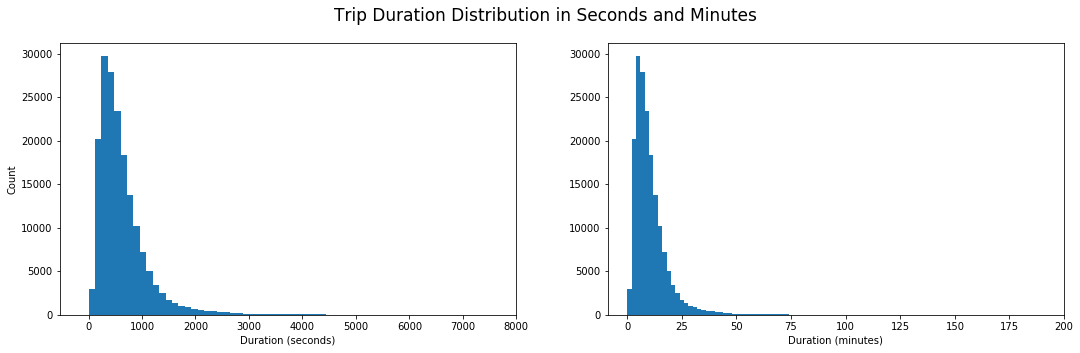

In [16]:
# View a standard-scaled plot with some x-axis limit
sec_bins = np.arange(0, rides_clean.duration_sec.max()+120, 120)
minute_bins = np.arange(0, rides_clean.duration_minute.max()+2, 2)
sec_labels = ['', 'Duration (seconds)', 'Count']
minute_labels = ['', 'Duration (minutes)']

plt.figure(figsize=(18,5))
base_color = sns.color_palette()[0]

plt.subplot(121)
plt.hist('duration_sec', data=rides_clean, bins=sec_bins)
add_labels(*sec_labels)
plt.xlim(xmax=8000);

plt.subplot(122)
plt.hist('duration_minute', data=rides_clean, bins=minute_bins)
add_labels(*minute_labels)
plt.xlim(xmax=200)
plt.suptitle('Trip Duration Distribution in Seconds and Minutes', fontsize=17);

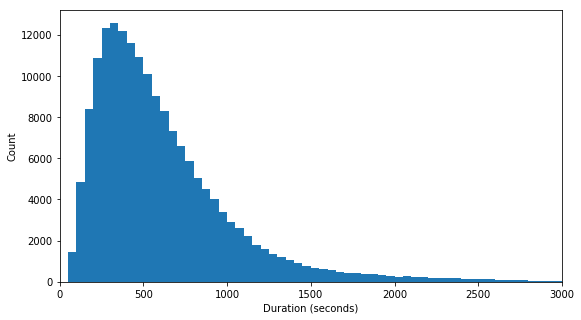

In [17]:
# View the distribution for trips below 3000 seconds
sec_bins = np.arange(0, rides_clean.duration_sec.max()+50, 50)
plt.hist('duration_sec', data=rides_clean, bins=sec_bins)
add_labels(*sec_labels)
plt.xlim(0, 3000);

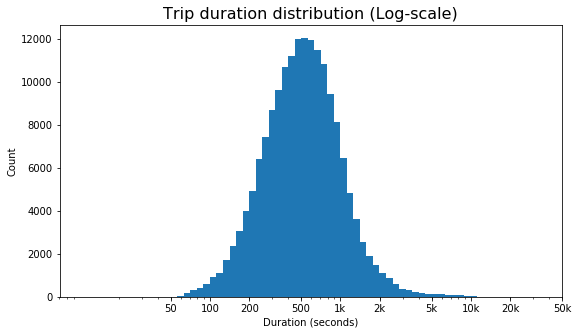

In [18]:
# View the log-scaled plot
bins = 10 ** np.arange(1, np.log10(rides_clean.duration_sec.max())+0.05, 0.05)
labels = ['Trip duration distribution (Log-scale)', 'Duration (seconds)', 'Count']

plt.hist('duration_sec', data=rides_clean, bins=bins)
plt.xscale('log')
plt.xticks([50,100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4],
           [50, 100, 200, 500, '1k', '2k', '5k', '10k', '20k', '50k'])
add_labels(*labels);

* Most trips are short (< 50 minutes) with majority of trips lasting less than 25 minutes resulting in a long tail; a right-skewed distribution.
* After log-scaling trip duration in seconds, we see a more symmetrical distribution. However, there are still extreme values to the right.
* These outliers may be a result of inaccurate data and could be investigated later.

### How are trips distributed across hours, time of day, days and weeks?

In [19]:
# Create 'hour' and 'weekday' columns
rides_clean['start_hour'] = rides_clean.start_time.dt.hour
rides_clean['weekday'] = rides_clean.start_time.dt.weekday_name

# Create a 'time_period' column
period_bins = [0, 6, 12, 18, 23]
period_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
rides_clean['time_period'] = pd.cut(rides_clean.start_time.dt.hour, bins=period_bins, labels=period_labels,
                                    include_lowest=True)

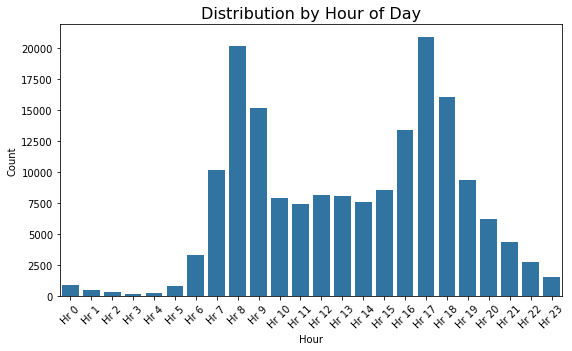

In [20]:
# View distribution of trips by hour
labels = ['Distribution by Hour of Day', 'Hour', 'Count']

sns.countplot('start_hour', data=rides_clean, color=base_color)
add_labels(*labels)
ticks = plt.xticks()[0]
plt.xticks(ticks, ['Hr {}'.format(str(t)) for t in ticks], rotation=45);

In [21]:
# Change the 'weekday' column to an ordered categorical datatype
weekday_dict = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                'Saturday', 'Sunday']
weekday_cat = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=weekday_dict)
rides_clean['weekday'] = rides_clean.weekday.astype(weekday_cat)

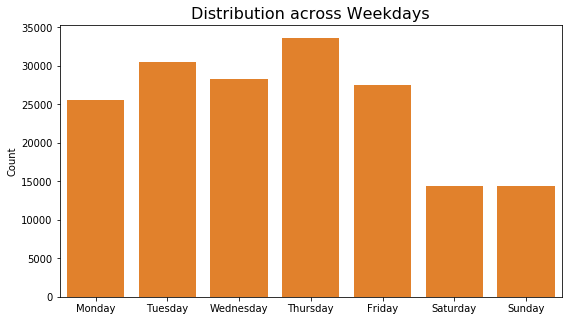

In [22]:
# View distribution of trips by weekday
labels = ['Distribution across Weekdays', '', 'Count']
yellow = sns.color_palette()[1]

sns.countplot('weekday', data=rides_clean, color=yellow)
add_labels(*labels)

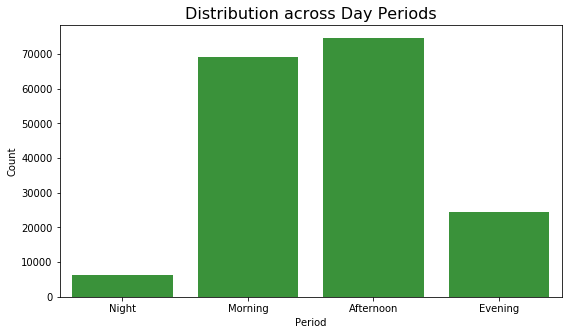

In [23]:
# View distribution of trips by periods of the day
labels = ['Distribution across Day Periods', 'Period', 'Count']
green = sns.color_palette()[2]

sns.countplot('time_period', data=rides_clean, color=green)
add_labels(*labels)

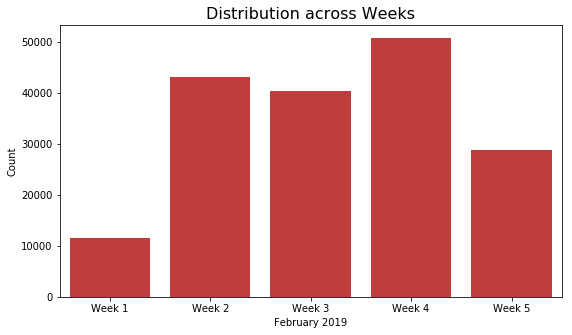

In [24]:
# View weekly trip volume
labels = ['Distribution across Weeks', 'February 2019', 'Count']
color = sns.color_palette()[3]
tick_labels = ['Week {}'.format(t) for t in range(1,6)]

sns.countplot(rides_clean.start_time.dt.week, color=color)
add_labels(*labels)
ticks = plt.xticks()[0]
plt.xticks(ticks, tick_labels);

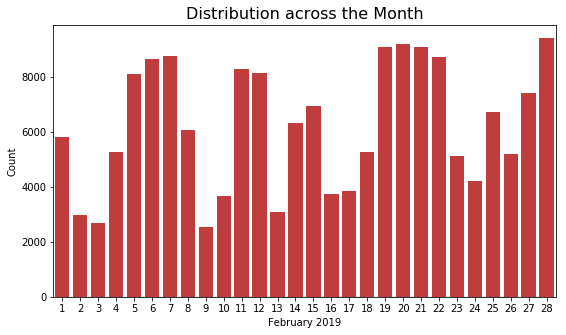

In [25]:
# View daily trip volumes for the whole month
labels = ['Distribution across the Month', 'February 2019', 'Count']
color = sns.color_palette()[3]

sns.countplot(rides_clean.start_time.dt.day, color=color)
add_labels(*labels)

* There are two peaks in trip volume during the day; early morning and late afternoon. These correspond to the times when people commute to and from work.
* Few trips are taken at night.
* In between peak trip periods, the trip volume is twice less than at the peak.
* More trips were taken on Thursdays with weekends seeing less than half of the trips taken on Thursdays. I had expected to see more trips taken in the evenings and on weekends. This further supports the fact that these bikes are mostly used to commute to and from work.
* There were more trips taken in the fourth week of February followed by a reduction, almost by half, the following week

### What category of users take more trips? What is the gender distribution? What proportion of trips are shared?

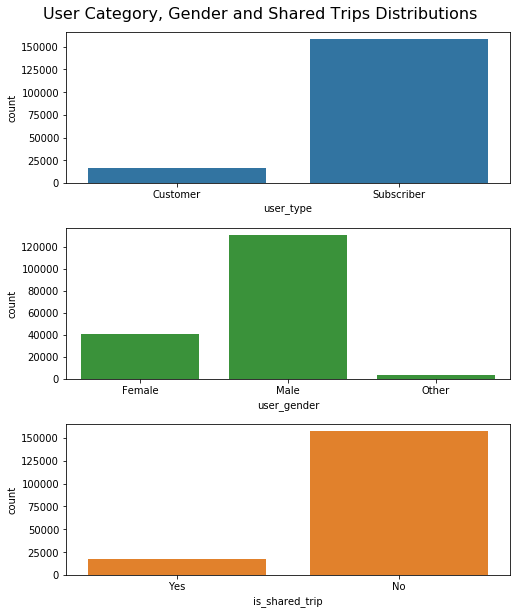

In [26]:
# View distributions of user/customer types, gender, and whether trips were shared
fig, ax = plt.subplots(nrows=3, figsize=(8,9))

sns.countplot(data=rides_clean, x='user_type', color=base_color, ax=ax[0])
sns.countplot(data=rides_clean, x='user_gender', color=green, ax=ax[1])
sns.countplot(data=rides_clean, x='is_shared_trip', color=yellow, ax=ax[2])
plt.suptitle('User Category, Gender and Shared Trips Distributions', fontsize=16)
plt.tight_layout(pad=3.5, h_pad=1);

* There are far more subscribers than customers.
* More males are represented in the dataset; at least three times more than females.
* Most trips are not shared.

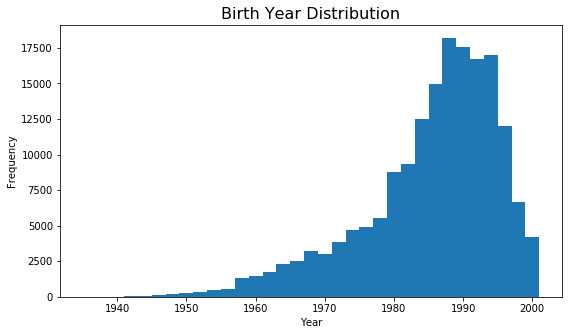

In [27]:
# View the birth year distribution
bins = np.arange(1935, rides_clean.user_birth_year.max()+2, 2)

plt.hist('user_birth_year', data=rides_clean, bins=bins)
add_labels('Birth Year Distribution', 'Year', 'Frequency');

* We see a left-skewed distribution with majority of users being less than 40 years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration variable had a few significant outliers despite removing rows with more extreme values. An initial right skew became a more symmetrical distribution after log transformation.

An increased volume of trips was seen during daily peak periods with Thursdays having the most number of trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were no unusual distributions except in the `duration_sec` column. More columns were feature-engineered to facilitate exploration. Seconds were converted to minutes and visualised; hour, weekday and day period variables were also extracted from existing columns.

## Bivariate Exploration

Let's explore pairwise correlations between the variables explored above.

In [28]:
numeric_cols = ['duration_sec', 'user_birth_year']
categorical_cols = ['user_type', 'user_gender', 'is_shared_trip', 'weekday',
                    'time_period']

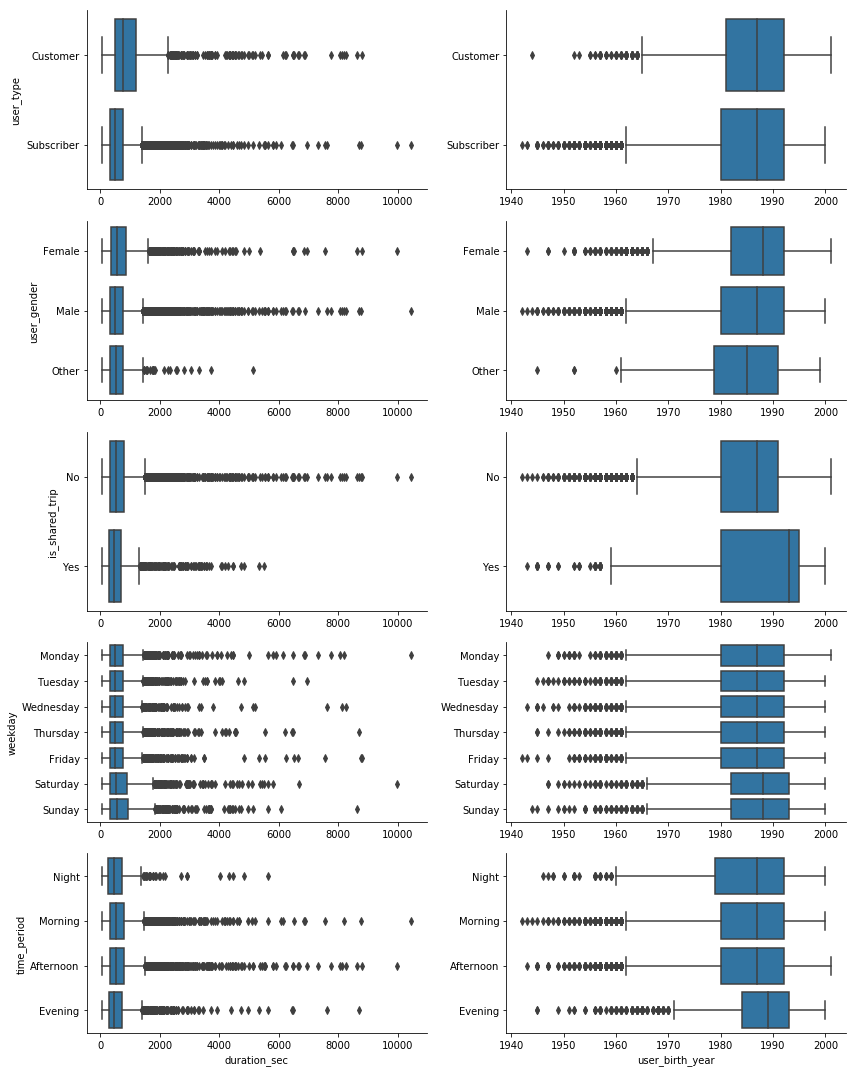

In [29]:
# plot matrix of numeric features against categorical features.
rides_clean_samp = rides_clean.sample(frac=0.1, random_state=42)

def boxgrid(x, y, **kwargs):
    """ Create custom box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

g = sns.PairGrid(data=rides_clean_samp, x_vars=numeric_cols, y_vars=categorical_cols,
                size=3, aspect=2)
g.map(boxgrid);
plt.tight_layout();

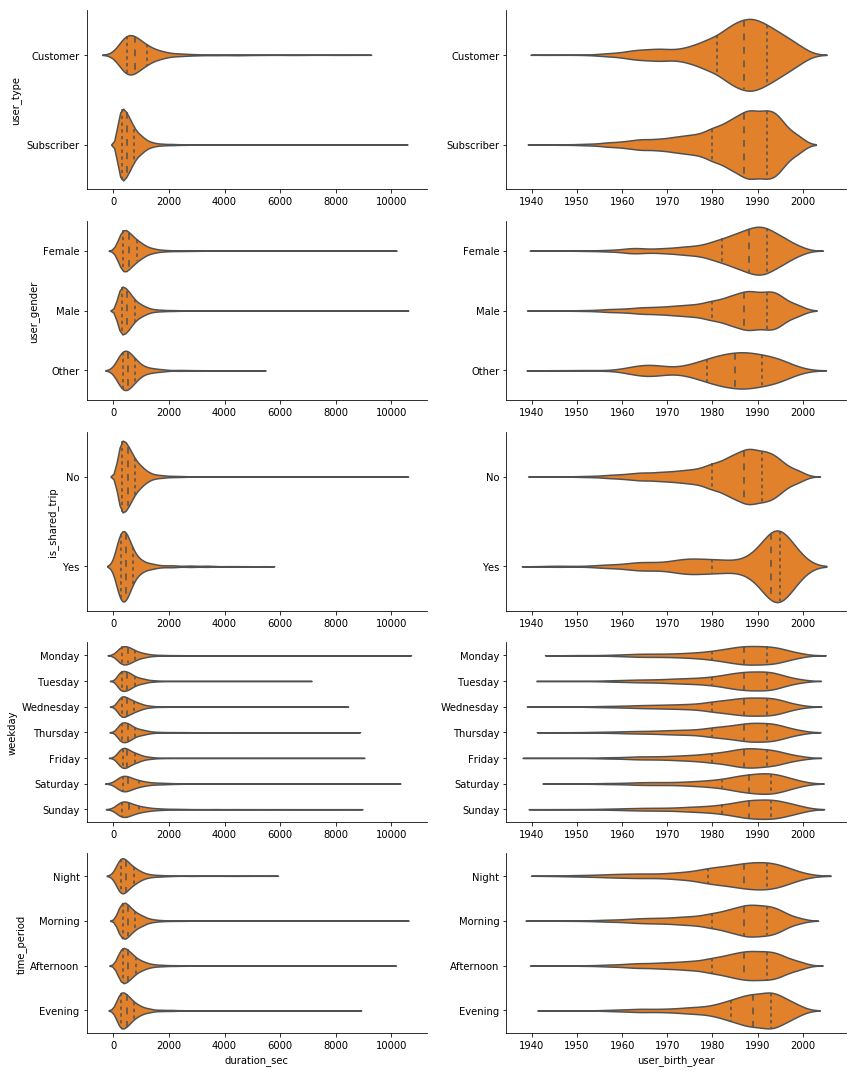

In [30]:
def violingrid(x, y, **kwargs):
    """ Create custom violin plots with seaborn's PairGrid. """
    color = sns.color_palette()[1]
    sns.violinplot(x=x, y=y, color=color, inner='quartile')

g = sns.PairGrid(data=rides_clean_samp, x_vars=numeric_cols, y_vars=categorical_cols,
                size=3, aspect=2)
g.map(violingrid);
plt.tight_layout();

A perusal of the box and violin grid plots above implies that:
* Customers tend to ride for longer than subscribers despite subscribers being the bulk of riders.
* There's no clear difference between genders regarding ride duration despite more males being represented in the data.
* Female riders, people who shared their rides and people who ride on weekends and in the evenings tend to be younger.

Since samples of the cleaned data were used above, I will confirm these relationships on the full data.

### What is the average ride duration across gender and user types? When are rides longer?

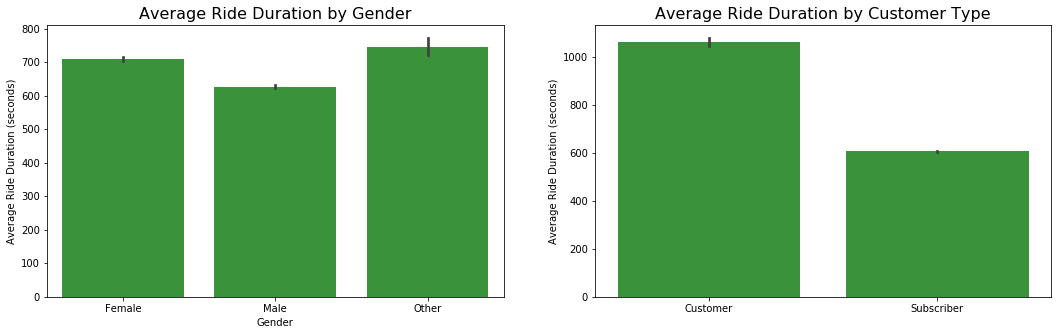

In [31]:
# View average ride duration across gender and user types
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(x='user_gender', y='duration_sec', data=rides_clean, color=green)
add_labels(title='Average Ride Duration by Gender', xlabel='Gender',
           ylabel='Average Ride Duration (seconds)')

plt.subplot(122)
sns.barplot(x='user_type', y='duration_sec', data=rides_clean, color=green)
add_labels(title='Average Ride Duration by Customer Type', xlabel='',
           ylabel='Average Ride Duration (seconds)');

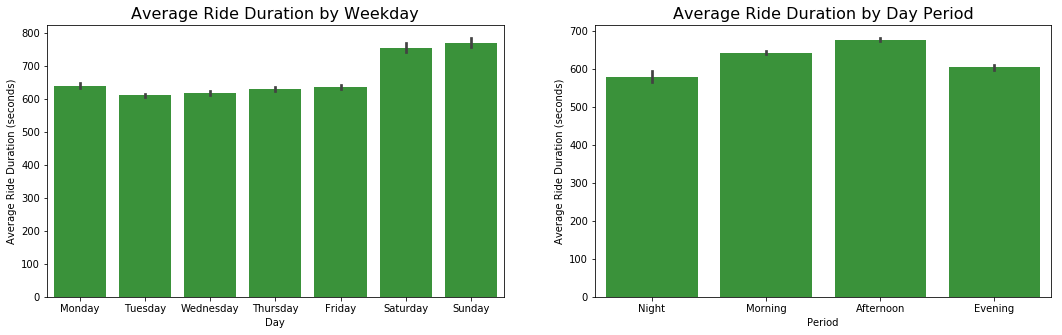

In [32]:
# Are trips longer on weekends or specific periods of the day?
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(x='weekday', y='duration_sec', data=rides_clean, color=green)
add_labels(title='Average Ride Duration by Weekday', xlabel='Day',
           ylabel='Average Ride Duration (seconds)')

plt.subplot(122)
sns.barplot(x='time_period', y='duration_sec', data=rides_clean, color=green)
add_labels(title='Average Ride Duration by Day Period', xlabel='Period',
           ylabel='Average Ride Duration (seconds)');

* Customers do have longer rides; almost twice as much as subscribers.
* Females have longer rides, on average, than males; 'Other's have the highest average though with a larger confidence interval due to the relatively smaller sample size.
* Rides are, on average, longer during the weekend and in the afternoon.

### Are there characteristics specific to relatively younger riders?

In [33]:
# Create an 'age' column
rides_clean['age'] = 2019 - rides_clean.user_birth_year

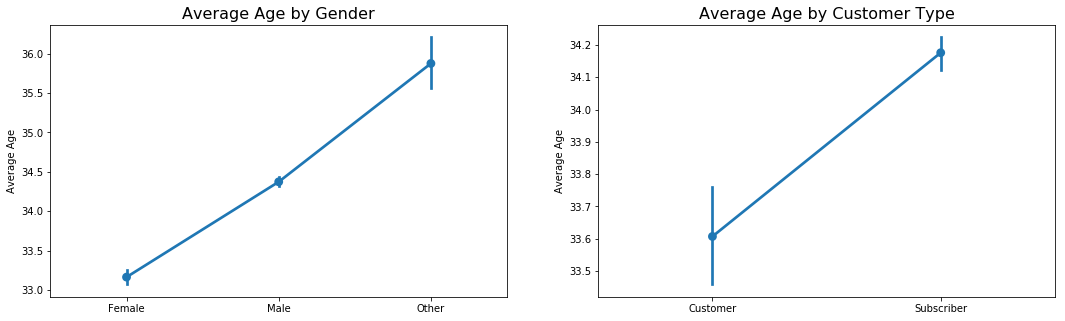

In [34]:
# Plot average age by gender and customer type
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.pointplot(x='user_gender', y='age', data=rides_clean, color=base_color)
add_labels(title='Average Age by Gender', xlabel='',
           ylabel='Average Age');

plt.subplot(122)
sns.pointplot(x='user_type', y='age', data=rides_clean, color=base_color)
add_labels(title='Average Age by Customer Type', xlabel='',
           ylabel='Average Age');

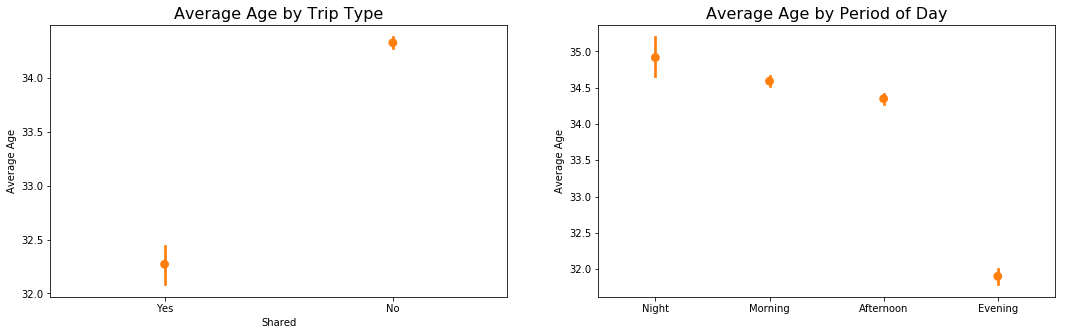

In [35]:
# Plot average age by trip type and period of the day
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.pointplot(x='is_shared_trip', y='age', data=rides_clean, color=yellow, linestyles='')
add_labels(title='Average Age by Trip Type', xlabel='Shared',
           ylabel='Average Age');

plt.subplot(122)
sns.pointplot(x='time_period', y='age', data=rides_clean, color=yellow, linestyles='')
add_labels(title='Average Age by Period of Day', xlabel='',
           ylabel='Average Age');

* Female riders are about 1-2 years younger, on average, than males and others.
* Shared trips are more frequent in relatively younger people who tend to bike more in the evenings.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We see that customers tend to ride for longer than subscribers despite subscribers making up the bulk of riders. Females also tend to ride for longer despite the majority of riders being male. The same holds for weekend rides as rides are on average longer on weekends.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

On average, younger people tend to share rides more and are also more likely to take evening rides.

## Multivariate Exploration

Let's check for further insights into or deviations from the above observations.

### Do female customers ride for longer than others?

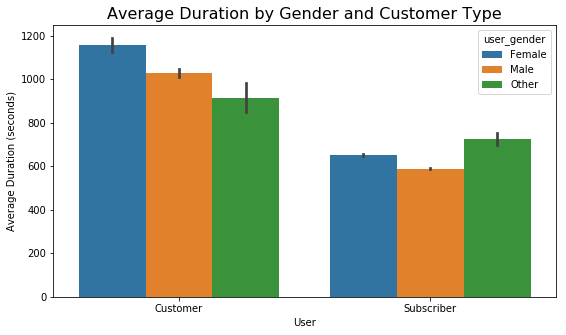

In [36]:
sns.barplot(x='user_type', y='duration_sec', hue='user_gender', data=rides_clean)
add_labels(title='Average Duration by Gender and Customer Type', xlabel='User',
           ylabel='Average Duration (seconds)');

* Female customers ride for longer, on average, than males and 'other's.

### Is there a significant difference in average trip duration across gender and periods of the day?

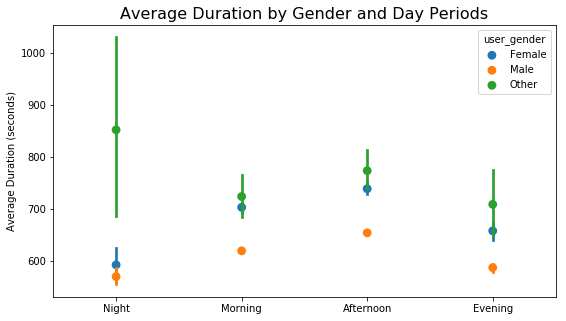

In [37]:
# Gender and day periods
sns.pointplot(x='time_period', y='duration_sec', hue='user_gender', data=rides_clean,
             linestyles='')
add_labels(title='Average Duration by Gender and Day Periods', xlabel='',
           ylabel='Average Duration (seconds)');

* Females still have higher average trip times than males across all time periods. While the 'other' category has the highest average trip times, its wider confidence interval points to a smaller sample size used in computation.

### Are female customers younger?

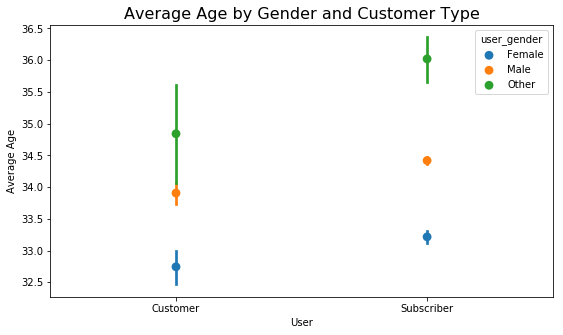

In [38]:
sns.pointplot(x='user_type', y='age', hue='user_gender', data=rides_clean,
             linestyles='')
add_labels(title='Average Age by Gender and Customer Type', xlabel='User',
           ylabel='Average Age');

* Female customers are younger.

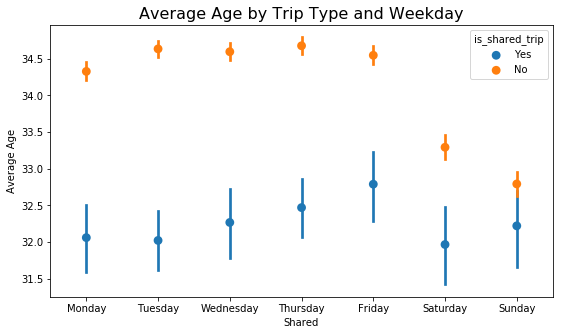

In [39]:
# View average user age across the week by shared trip
sns.pointplot(x='weekday', y='age', hue='is_shared_trip', data=rides_clean,
             linestyles='')
add_labels(title='Average Age by Trip Type and Weekday', xlabel='Shared',
           ylabel='Average Age');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The previously noticed trends in females having longer average trip durations and being younger despite segmentation still held up. Conversely, males had shorter trips and were relatively older.

### Were there any interesting or surprising interactions between features?

There seems to be an interesting reduction in the average age gap between users who shared trips and those who do not during the weekends.

## Conclusions

>Although some cleaning had to be done on the data and there were a lot of outliers, I was able to delineate some patterns/trends. The number of rides taken peaked during daily rush hours. Ride volume was highest on Thursdays and lowest during the weekends. Customers and female riders had relatively longer rides and male riders were older. Younger riders were more likely to take shared trips and undergo evening rides.
Further analysis could be undertaken by appending data from preceeding months to see if these patterns old or new ones appear.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford_GoBike_Exploration_I.ipynb'])

0